## Purpose: Model Comparison

Demonstration: 
    1. Parameter fit
    2. Use of Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from PolynomialModel import PolynomialModel
from Fitter import Fitter
from Formatter import formatter as fmt
from Plotter import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


define the fitter: Fitter

Polynomial degree  0   blue
Fit params           3.270
    stdev            0.821
    chisq          283.260
    evidence       -29.739
Polynomial degree  1   green
Fit params       [    2.192    2.156]
    stdev        [    0.407    0.255]
    chisq           59.533
    evidence       -25.476
Polynomial degree  2   red
Fit params       [    0.675    1.413    0.743]
    stdev        [    0.249    0.141    0.084]
    chisq           11.134
    evidence       -21.555
Polynomial degree  3   mint
Fit params       [    1.196    0.506    0.339    0.270]
    stdev        [    0.022    0.021    0.010    0.005]
    chisq            0.069
    evidence        -5.882
Polynomial degree  4   magenta
Fit params       [    1.191    0.496    0.347    0.274   -0.002]
    stdev        [    0.025    0.030    0.021    0.010    0.004]
    chisq            0.068
    evidence       -10.141
Polynomial degree  5   yellow
Fit params       [    1.214    0.466    0.294    0.300    0.011   -0.005]
    stdev        

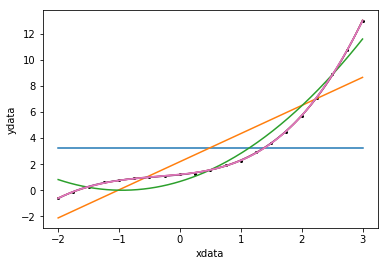

In [4]:
plotFit( x, y, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

Plot the evidence as function of the polynomial degree.

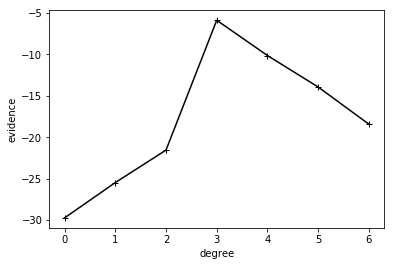

In [5]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()